In [13]:
__version__ = '0.3'
__author__  = "Robert Matern (r.matern@stud.uni-hannover.de)"
__date__    = ''
__url__     = ''
__copyright__ = "(C) 2015 Robert Matern"

#Beispieldaten Nr. 10

In [14]:
%run Parameter.ipynb
%run DynamicProgramm.ipynb

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Produkte
products = Product(3)

# Ressourcen
resources = Resource(1)

#Kapazität
capacities = Capacity(resources)
capacities[1] = 10
#capacities[2] = 10
#capacities[3] = 10
#capacities[4] = 10
#capacities[5] = 5
#capacities[6] = 5
#capacities[7] = 5
#capacities[8] = 5
#capacities[9] = 5
#capacities[10] = 5
#capacities[11] = 5
#capacities[12] = 5
#capacities[13] = 5

# Ressourcenverbrauch
consumtions = Consumption(products, resources)
consumtions[1] = [0,1]#,0,1,0]#,1,1,0,1,1,1,1,0,1]
consumtions[2] = [0,1]#,1,0,1]#,1,0,0,1,1,0,1,1,0]
consumtions[3] = [0,1]#,1,1,0]#,0]#,1,1,0,0,0,1,0,0]
#consumtions[4] = [0,1,1,0,1]#,1]#,1,0,1,1,0,0,0,0]
#consumtions[5] = [0,0,1,1,0]#,0]#,0,0,1,1,1,1,0,1]

# Erträge
revenues = Revenue(products)
revenues[1] = 100
revenues[2] = 200
revenues[3] = 300
#revenues[4] = 220
#revenues[5] = 150

# Buchungshorizont
times = Time(10)

# Wahrscheinlichkeiten
probs = Prob(products, times)
#import random as rd
#for t in range(len(times)-1):
#    random = 0
#    for i in products[1:]:
#        i_random = rd.uniform(random, 10.0)
#        probs[i][t] = i_random/10.0
#        random = i_random
probs[1] = [0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
probs[2] = [0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
probs[3] = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
#probs[4] = [0.0, 0.1, 0.1, 0.0, 0.6, 0.1, 0.2, 0.1, 0.1, 0.1, 0]
#probs[5] = [0.1, 0.1, 0.2, 0.1, 0.1, 0.0, 0.2, 0.2, 0.2, 0.1, 0]

# Gegenwahrscheinlichkeiten
against_probs = Against_Prob(probs)
probs[0] = against_probs

# Systemzustände
conditions = Condition(capacities, resources, times)

# Endzeitpunkte
#end_times = End_Time(conditions)

0:00:00.000318


In [17]:
import datetime
a = datetime.datetime.now()
print DP(solutions, conditions, products, resources, capacities, consumtions, times)
print datetime.datetime.now()-a

1200.0
0:00:00.037112


In [18]:
# Erstellung der Struktur als NetworkX-Graph
graph = Structure(solutions, products, consumtions, revenues, probs)

# Ermittlung der besten Politik (Dijkstra Algorithmus)
best_politic = Best_Politic(graph, times)

Kürzester Pfad: [10, 9, 8, 18, 17, 16, 26, 25, 24, 34, 33] 

Startzustand: {'time': 10, 'capacity': array([10]), 'value': 1200.0, 'label': array([10, 10])} 

Die beste Politik zum Zeitpunkt 10 ist die Annahme des Auftrags:
{0: {'goal': array([10,  9]), 'weight': 1080.0, 'revenue': 0}} 

Die beste Politik zum Zeitpunkt 9 ist die Annahme des Auftrags:
{0: {'goal': array([10,  8]), 'weight': 960.0, 'revenue': 0}} 

Die beste Politik zum Zeitpunkt 8 ist die Annahme des Auftrags:
{1: {'goal': array([9, 7]), 'weight': 840.0, 'revenue': 100}, 2: {'goal': array([9, 7]), 'weight': 840.0, 'revenue': 200}, 3: {'goal': array([9, 7]), 'weight': 840.0, 'revenue': 300}} 

Die beste Politik zum Zeitpunkt 7 ist die Annahme des Auftrags:
{0: {'goal': array([9, 6]), 'weight': 720.0, 'revenue': 0}} 

Die beste Politik zum Zeitpunkt 6 ist die Annahme des Auftrags:
{0: {'goal': array([9, 5]), 'weight': 600.0, 'revenue': 0}} 

Die beste Politik zum Zeitpunkt 5 ist die Annahme des Auftrags:
{1: {'goal': array

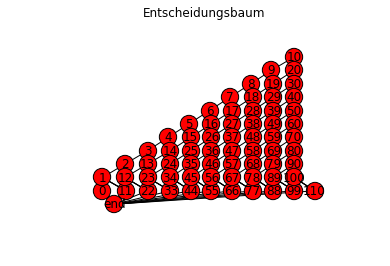

In [19]:
Drawing(graph)